# Word2Vec

Let's work on skipgram-based implementation of word2vec.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. Define some very NLTK news data

# Task 1

In [2]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
corpus = brown.sents(categories='news')

In [4]:
print("List in 'news' category:")
print(len(corpus))

List in 'news' category:
4623


In [5]:
# Filter the `corpus` list to include only sentences (`sent`) that have a length greater than 2.
# This effectively removes short sentences or strings, such as empty strings or those with very few characters.
# The updated `corpus` list is then returned or stored

corpus = [sent for sent in corpus if len(sent) > 2]
corpus

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['The',
  'September-October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  '``',
  'irregularities',
  "''",
 

In [6]:
print("List in 'news' category:")
print(len(corpus))

List in 'news' category:
4504


In [7]:
#get word sequences and unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['magazine',
 'ball',
 'Arden',
 'Leader',
 'pixies',
 'Heilman',
 'lights',
 '18,792',
 'supernatural',
 'trend',
 'renowned',
 'boobify',
 'block',
 'Fitzhugh',
 'pilots',
 'part-time',
 '$581,000',
 'Felske',
 'expect',
 'last-minute',
 'education',
 'leather',
 'nine-game',
 'themselves',
 'meditating',
 'Tulane',
 'cigaret',
 'measuring',
 'concentrate',
 'Eligio',
 'Sargent',
 'creation',
 'fails',
 'morning',
 'favored',
 'Peck',
 '$57,500',
 'afloat',
 'bankruptcy',
 'specialties',
 'culture',
 'York',
 'Hood',
 "Cipriani's",
 'candy',
 'Grand',
 'obtaining',
 'meals',
 'Turner',
 'Librarians',
 'Lancashire',
 'Sapio',
 'threatening',
 'PTC',
 'pro-Western',
 'breed',
 'norm',
 'oil',
 'Welborn',
 'tragedy',
 'headmaster',
 'Had',
 'pondered',
 'patrol',
 'fines',
 'includes',
 'handsome',
 'look',
 'Principal',
 'Armory',
 '637',
 'flicker',
 'belonged',
 '62-year-old',
 "Bombers'",
 'create',
 'imbroglio',
 "guide's",
 'mess',
 'Church',
 'ago',
 'opens',
 'Syria',
 'forces',

In [8]:
#numericalization
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'magazine': 0, 'ball': 1, 'Arden': 2, 'Leader': 3, 'pixies': 4, 'Heilman': 5, 'lights': 6, '18,792': 7, 'supernatural': 8, 'trend': 9, 'renowned': 10, 'boobify': 11, 'block': 12, 'Fitzhugh': 13, 'pilots': 14, 'part-time': 15, '$581,000': 16, 'Felske': 17, 'expect': 18, 'last-minute': 19, 'education': 20, 'leather': 21, 'nine-game': 22, 'themselves': 23, 'meditating': 24, 'Tulane': 25, 'cigaret': 26, 'measuring': 27, 'concentrate': 28, 'Eligio': 29, 'Sargent': 30, 'creation': 31, 'fails': 32, 'morning': 33, 'favored': 34, 'Peck': 35, '$57,500': 36, 'afloat': 37, 'bankruptcy': 38, 'specialties': 39, 'culture': 40, 'York': 41, 'Hood': 42, "Cipriani's": 43, 'candy': 44, 'Grand': 45, 'obtaining': 46, 'meals': 47, 'Turner': 48, 'Librarians': 49, 'Lancashire': 50, 'Sapio': 51, 'threatening': 52, 'PTC': 53, 'pro-Western': 54, 'breed': 55, 'norm': 56, 'oil': 57, 'Welborn': 58, 'tragedy': 59, 'headmaster': 60, 'Had': 61, 'pondered': 62, 'patrol': 63, 'fines': 64, 'includes': 65, 'handsome': 66,

In [9]:
#vocab size
voc_size = len(vocab)
print(voc_size)

14326


In [10]:
#append UNK
vocab.append('<UNK>')

In [11]:
vocab

['magazine',
 'ball',
 'Arden',
 'Leader',
 'pixies',
 'Heilman',
 'lights',
 '18,792',
 'supernatural',
 'trend',
 'renowned',
 'boobify',
 'block',
 'Fitzhugh',
 'pilots',
 'part-time',
 '$581,000',
 'Felske',
 'expect',
 'last-minute',
 'education',
 'leather',
 'nine-game',
 'themselves',
 'meditating',
 'Tulane',
 'cigaret',
 'measuring',
 'concentrate',
 'Eligio',
 'Sargent',
 'creation',
 'fails',
 'morning',
 'favored',
 'Peck',
 '$57,500',
 'afloat',
 'bankruptcy',
 'specialties',
 'culture',
 'York',
 'Hood',
 "Cipriani's",
 'candy',
 'Grand',
 'obtaining',
 'meals',
 'Turner',
 'Librarians',
 'Lancashire',
 'Sapio',
 'threatening',
 'PTC',
 'pro-Western',
 'breed',
 'norm',
 'oil',
 'Welborn',
 'tragedy',
 'headmaster',
 'Had',
 'pondered',
 'patrol',
 'fines',
 'includes',
 'handsome',
 'look',
 'Principal',
 'Armory',
 '637',
 'flicker',
 'belonged',
 '62-year-old',
 "Bombers'",
 'create',
 'imbroglio',
 "guide's",
 'mess',
 'Church',
 'ago',
 'opens',
 'Syria',
 'forces',

In [12]:
word2index['<UNK>'] = 0

In [13]:
#just in case we need to use
index2word = {v:k for k, v in word2index.items()} 

In [14]:
index2word

{0: '<UNK>',
 1: 'ball',
 2: 'Arden',
 3: 'Leader',
 4: 'pixies',
 5: 'Heilman',
 6: 'lights',
 7: '18,792',
 8: 'supernatural',
 9: 'trend',
 10: 'renowned',
 11: 'boobify',
 12: 'block',
 13: 'Fitzhugh',
 14: 'pilots',
 15: 'part-time',
 16: '$581,000',
 17: 'Felske',
 18: 'expect',
 19: 'last-minute',
 20: 'education',
 21: 'leather',
 22: 'nine-game',
 23: 'themselves',
 24: 'meditating',
 25: 'Tulane',
 26: 'cigaret',
 27: 'measuring',
 28: 'concentrate',
 29: 'Eligio',
 30: 'Sargent',
 31: 'creation',
 32: 'fails',
 33: 'morning',
 34: 'favored',
 35: 'Peck',
 36: '$57,500',
 37: 'afloat',
 38: 'bankruptcy',
 39: 'specialties',
 40: 'culture',
 41: 'York',
 42: 'Hood',
 43: "Cipriani's",
 44: 'candy',
 45: 'Grand',
 46: 'obtaining',
 47: 'meals',
 48: 'Turner',
 49: 'Librarians',
 50: 'Lancashire',
 51: 'Sapio',
 52: 'threatening',
 53: 'PTC',
 54: 'pro-Western',
 55: 'breed',
 56: 'norm',
 57: 'oil',
 58: 'Welborn',
 59: 'tragedy',
 60: 'headmaster',
 61: 'Had',
 62: 'pondered',

## 2. Prepare train data

In [15]:
for c in corpus:
    print(c)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']
['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports

In [16]:
def random_batch(batch_size, corpus, window_size=2):
    
    # Make skip gram of one size window
    skip_grams = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus:
        if len(sent) > 2 * window_size:
                
            for i in range(window_size, len(sent) - window_size):
                target = word2index[sent[i]]
                
                for j in range(-window_size, window_size+1):
                    if j!=0:
                        outside = word2index[sent[i+j]]
                        skip_grams.append([target, outside])
    
    # print(f"Generated {len(skip_grams)} skip-grams with window size {window_size}")

    if len(skip_grams) == 0:
        raise ValueError("No skip-grams generated. Check the corpus and window size")

    
     # Randomly sample a batch of skip-grams
    random_indices = np.random.choice(len(skip_grams), batch_size, replace=False)
    inputs = np.array([skip_grams[i][0] for i in random_indices])
    labels = np.array([skip_grams[i][1] for i in random_indices])
            
    return inputs.reshape(-1, 1), labels.reshape(-1, 1)

### Testing the method

In [17]:
#testing the method
batch_size = 10 # mini-batch size
input_batch, target_batch = random_batch(4, corpus, 4)

print("Input: ", input_batch)
print("Target: ", target_batch)


Input:  [[9092]
 [2896]
 [7809]
 [5314]]
Target:  [[ 8843]
 [13871]
 [12855]
 [ 1379]]


In [18]:
corpus

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['The',
  'September-October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  '``',
  'irregularities',
  "''",
 

## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

In [19]:
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        all_embeds    = self.embedding_u(all_vocabs) #   [batch_size, voc_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, voc_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, voc_size, 1] = [batch_size, voc_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

## 4. Training

In [20]:
batch_size     = 128 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Skipgram(voc_size, embedding_size)

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([128, 14327])

In [22]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [24]:
import time

# Training
num_epochs = 500
batch_size = 128
window_sizes = [1,2,4,5,6,8]

for window_size in window_sizes:
    print(f"Training model with window size: {window_size}\n")    
    for epoch in range(num_epochs):
        
        start = time.time()
        
        input_batch, target_batch = random_batch(batch_size, corpus, window_size)
        input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
        target_batch = torch.LongTensor(target_batch) #[batch_size, 1]


        optimizer.zero_grad()
        loss= model(input_batch, target_batch, all_vocabs)
        
        loss.backward()
        optimizer.step()
        
        end = time.time()
        
        epoch_mins, epoch_secs = epoch_time(start, end)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch: {epoch + 1} | loss: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")


Training model with window size: 1

Epoch: 100 | loss: 10.488125 | time: 0m 0s
Epoch: 200 | loss: 10.397894 | time: 0m 0s
Epoch: 300 | loss: 10.560900 | time: 0m 0s
Epoch: 400 | loss: 10.210385 | time: 0m 0s
Epoch: 500 | loss: 10.260798 | time: 0m 0s
Training model with window size: 2

Epoch: 100 | loss: 9.918886 | time: 0m 0s
Epoch: 200 | loss: 10.184853 | time: 0m 0s
Epoch: 300 | loss: 10.117240 | time: 0m 0s
Epoch: 400 | loss: 9.951435 | time: 0m 0s
Epoch: 500 | loss: 9.778402 | time: 0m 1s
Training model with window size: 4

Epoch: 100 | loss: 9.998319 | time: 0m 1s
Epoch: 200 | loss: 9.921036 | time: 0m 1s
Epoch: 300 | loss: 9.789164 | time: 0m 1s
Epoch: 400 | loss: 9.727280 | time: 0m 1s
Epoch: 500 | loss: 9.786381 | time: 0m 0s
Training model with window size: 5

Epoch: 100 | loss: 9.754400 | time: 0m 0s
Epoch: 200 | loss: 9.735588 | time: 0m 0s
Epoch: 300 | loss: 9.817741 | time: 0m 1s
Epoch: 400 | loss: 9.742302 | time: 0m 0s
Epoch: 500 | loss: 9.792381 | time: 0m 0s
Training 

## 5. Plotting the embeddings

In [29]:
#list of vocabs
vocab[:10]

['magazine',
 'ball',
 'Arden',
 'Leader',
 'pixies',
 'Heilman',
 'lights',
 '18,792',
 'supernatural',
 'trend']

In [30]:
word = vocab[0]
word

'magazine'

In [31]:
#numericalization
id = word2index[word]
id

0

In [32]:
id_tensor = torch.LongTensor([id])
id_tensor

tensor([0])

In [33]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[ 1.0791, -1.1392]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.9506, -0.6606]], grad_fn=<EmbeddingBackward0>))

In [34]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-0.8999, grad_fn=<SelectBackward0>)

In [35]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

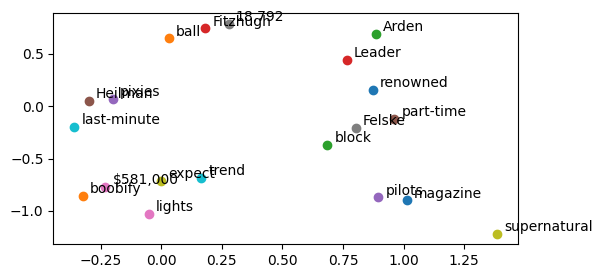

In [36]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

# Task 2

In [37]:
def get_full_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor)
    word_embed = (v_embed + u_embed) / 2
    return word_embed[0].detach().numpy()  # Return the full vector as a NumPy array

In [38]:
# Syntactic and semantic accuracy
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

def calculate_accuracy(questions, word_vectors, word2index):
    """
    Calculate accuracy for analogy questions.
    
    Args:
        questions (list): List of analogy questions in format 'a b c d'.
        word_vectors (np.array): Pre-trained word vectors.
        word2index (dict): Mapping of words to their indices in `word_vectors`.
    
    Returns:
        float: Accuracy as a percentage.
    """
    correct = 0
    total = 0

    for question in questions:
        try:
            a, b, c, d = question.split()
            if a in word2index and b in word2index and c in word2index and d in word2index:
                vec_a = word_vectors[word2index[a]]
                vec_b = word_vectors[word2index[b]]
                vec_c = word_vectors[word2index[c]]
                
                # Compute vector: b - a + c
                target_vector = vec_b - vec_a + vec_c
                # Find most similar word
                similarities = cosine_similarity(target_vector.reshape(1, -1), word_vectors)
                predicted_index = np.argmax(similarities)
                predicted_word = list(word2index.keys())[predicted_index]

                if predicted_word == d:
                    correct += 1
                total += 1
        except Exception as e:
            continue  # Skip malformed questions or missing words

    return (correct / total) * 100 if total > 0 else 0

# Load the dataset and split into semantic and syntactic subsets
def load_dataset(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    semantic_questions = []
    syntactic_questions = []
    current_section = None  # Initialize current_section

    for line in lines:
        if line.startswith(": capital-common-countries"):
            current_section = "semantic"
        elif line.startswith(": past-tense"):
            current_section = "syntactic"
        elif line.startswith(":"):
            current_section = None  # Reset for unrelated sections
        elif current_section == "semantic":
            semantic_questions.append(line.strip())
        elif current_section == "syntactic":
            syntactic_questions.append(line.strip())
    
    return semantic_questions, syntactic_questions

In [39]:
# Create word_vectors dictionary
word_vectors = {}

# Generate embeddings for all words in the vocabulary
for word in vocab:
    if word in word2index:  # Ensure the word is in the index
        word_vectors[word] = get_full_embed(word)  # Use get_full_embed for the full vector

print(f"Generated {len(word_vectors)} word vectors.")


Generated 14327 word vectors.


In [40]:
semantic_questions, syntactic_questions = load_dataset("word-test.v1.txt")

semantic_accuracy = calculate_accuracy(semantic_questions, word_vectors, word2index)
syntactic_accuracy = calculate_accuracy(syntactic_questions, word_vectors, word2index)

print(f"Semantic Accuracy: {semantic_accuracy:.2f}%")
print(f"Syntactic Accuracy: {syntactic_accuracy:.2f}%")

Semantic Accuracy: 0.00%
Syntactic Accuracy: 0.00%


## 6. Cosine similarity

Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

If $p$ and $q$ is super similar, the result is 1 otherwise 0.

In [41]:
vocab

['magazine',
 'ball',
 'Arden',
 'Leader',
 'pixies',
 'Heilman',
 'lights',
 '18,792',
 'supernatural',
 'trend',
 'renowned',
 'boobify',
 'block',
 'Fitzhugh',
 'pilots',
 'part-time',
 '$581,000',
 'Felske',
 'expect',
 'last-minute',
 'education',
 'leather',
 'nine-game',
 'themselves',
 'meditating',
 'Tulane',
 'cigaret',
 'measuring',
 'concentrate',
 'Eligio',
 'Sargent',
 'creation',
 'fails',
 'morning',
 'favored',
 'Peck',
 '$57,500',
 'afloat',
 'bankruptcy',
 'specialties',
 'culture',
 'York',
 'Hood',
 "Cipriani's",
 'candy',
 'Grand',
 'obtaining',
 'meals',
 'Turner',
 'Librarians',
 'Lancashire',
 'Sapio',
 'threatening',
 'PTC',
 'pro-Western',
 'breed',
 'norm',
 'oil',
 'Welborn',
 'tragedy',
 'headmaster',
 'Had',
 'pondered',
 'patrol',
 'fines',
 'includes',
 'handsome',
 'look',
 'Principal',
 'Armory',
 '637',
 'flicker',
 'belonged',
 '62-year-old',
 "Bombers'",
 'create',
 'imbroglio',
 "guide's",
 'mess',
 'Church',
 'ago',
 'opens',
 'Syria',
 'forces',

In [42]:
#let's try similarity between first and second, and second and third
rough          = get_embed('rough')
fraud        = get_embed('fraud')
Pakistanis       = get_embed('Pakistanis')

In [44]:
#numpy version
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
    
print(f"Pakistanis vs. fraud: ",        cos_sim(Pakistanis, fraud))
print(f"Pakistanis vs. rough: ",       cos_sim(Pakistanis, rough))
print(f"Pakistanis vs. Pakistanis: ",          cos_sim(Pakistanis, Pakistanis))

Pakistanis vs. fraud:  -0.7476307454911972
Pakistanis vs. rough:  -0.1788463054557966
Pakistanis vs. Pakistanis:  0.9999999999999998


In [45]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"Pakistanis vs. fraud: ",        cos_sim(Pakistanis, fraud))
print(f"Pakistanis vs. rough: ",       cos_sim(Pakistanis, rough))
print(f"Pakistanis vs. Pakistanis: ",          cos_sim(Pakistanis, Pakistanis))

Pakistanis vs. fraud:  -0.7476307454911972
Pakistanis vs. rough:  -0.17884630545579672
Pakistanis vs. Pakistanis:  1.0


# Task 3

In [46]:
def load_similarity_dataset(filepath):
    """
    Load the WordSim similarity dataset.
    Args:
        filepath (str): Path to the dataset file.
    Returns:
        list: List of tuples (word1, word2, human_score).
    """
    pairs = []
    with open(filepath, "r") as f:
        lines = f.readlines()
        for line in lines:
            word1, word2, score = line.strip().split()
            pairs.append((word1, word2, float(score)))
    return pairs




In [47]:
# Load `wordsim_similarity_goldstandard`
similarity_dataset = load_similarity_dataset("wordsim353/wordsim_similarity_goldstandard.txt")
print(f"Loaded {len(similarity_dataset)} word pairs from the dataset.")

Loaded 203 word pairs from the dataset.


In [48]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
import numpy as np



# Function to compute model similarity using dot product
def compute_model_similarity(word_vectors, similarity_dataset):
    """
    Compute model similarity for word pairs using dot product.
    Args:
        word_vectors (dict): Dictionary mapping words to their embeddings.
        similarity_dataset (list): List of tuples (word1, word2, human_score).
    Returns:
        tuple: List of model scores and human similarity scores.
    """
    model_scores = []
    human_scores = []

    for word1, word2, human_score in similarity_dataset:
        if word1 in word_vectors and word2 in word_vectors:
            vec1 = word_vectors[word1]
            vec2 = word_vectors[word2]
            model_score = np.dot(vec1, vec2)  # Dot product as similarity
            model_scores.append(model_score)
            human_scores.append(human_score)
        else:
            print(f"Skipping pair ({word1}, {word2}): Out of vocabulary")

    return model_scores, human_scores


   


In [50]:


# Load word vectors (replace with your trained model's word_vectors)
# word_vectors should be a dictionary mapping words to their embeddings

# Compute model and human similarity scores
model_scores, human_scores = compute_model_similarity(word_vectors, similarity_dataset)

# Calculate Spearman correlation
correlation, p_value = spearmanr(model_scores, human_scores)
print(f"Spearman Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Calculate MSE
mse = mean_squared_error(human_scores, model_scores)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Skipping pair (tiger, cat): Out of vocabulary
Skipping pair (tiger, tiger): Out of vocabulary
Skipping pair (media, radio): Out of vocabulary
Skipping pair (cucumber, potato): Out of vocabulary
Skipping pair (smart, stupid): Out of vocabulary
Skipping pair (king, rook): Out of vocabulary
Skipping pair (bishop, rabbi): Out of vocabulary
Skipping pair (fuck, sex): Out of vocabulary
Skipping pair (football, soccer): Out of vocabulary
Skipping pair (Arafat, Jackson): Out of vocabulary
Skipping pair (vodka, gin): Out of vocabulary
Skipping pair (vodka, brandy): Out of vocabulary
Skipping pair (drink, eat): Out of vocabulary
Skipping pair (gem, jewel): Out of vocabulary
Skipping pair (journey, voyage): Out of vocabulary
Skipping pair (coast, shore): Out of vocabulary
Skipping pair (asylum, madhouse): Out of vocabulary
Skipping pair (magician, wizard): Out of vocabulary
Skipping pair (midday, noon): Out of vocabulary
Skipping pair (furnace, stove): Out of vocabulary
Skipping pair (food, fruit

In [53]:
print("Model Score vs Human Score\n")
print(model_scores)
print(human_scores)

Model Score vs Human Score

[-0.85119486, -0.7335682, -2.4670064, -0.17718357, 0.18037856, 0.0931215, -0.11875551, -0.1418655, 0.9542017, 2.013247, -0.44312525, -0.25796834, 0.09095228, 0.10191051, -0.74801034, 0.7807164, -0.28191045, 0.11732426, -0.16766103, 0.28688908, -0.024701722, 0.015806798, 0.19145656, -0.39620247, -0.05534774, 0.13645236, 0.023847006, 0.7787874, -1.4237616, -0.5041617, -0.8312894, -0.49362293, 0.11767387, 0.26648843, -0.77683634, 0.011641957, 0.25750807, -0.08198871, -0.044095576, 0.17251845, -0.5677111, -0.4466021, -0.06157966, -0.86328065, 0.17517436, 0.07865905, 0.40226677, 0.98048115, 0.07654548, 0.3460697, -0.055677623, 0.1087423, 0.50314724, -0.77341044, 0.14055756, -0.6234349, -0.3572638, -0.10921859, 0.014305595, -1.1448493, -0.018917501, 0.5959063, -0.1827021, 0.06577737, 0.28761935, -0.28861544, -0.55305785, 0.32484168, -0.039425213, 0.14088565, -0.06769493, 0.07729538, 0.1887311, 0.0932716, -0.0028531328, 0.1905827, -1.3855755, 0.30715662, 0.39651936